# Hypothesis Testing On Death Penalty in USA

#### Does sex affect favouring or not the capital punishment (cappun) in USA?
    
  ##### Let's find out by using a sample drawn from GSS (General Social Survey)!

In [1]:
# Load packages
library(tidyverse)
library(ggplot2)
library(infer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'infer' was built under R version 3.6.3"

In [1]:
# Load data
load("datasets/gss.RData")

In [1]:
# Glimpse data
glimpse(gss)

Observations: 50,346
Variables: 28
$ id       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ year     <dbl> 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982...
$ age      <fct> 41, 49, 27, 24, 57, 29, 21, 68, 54, 80, 74, 30, 53, 39, 36...
$ class    <fct> WORKING CLASS, WORKING CLASS, MIDDLE CLASS, MIDDLE CLASS, ...
$ degree   <fct> LT HIGH SCHOOL, HIGH SCHOOL, HIGH SCHOOL, HIGH SCHOOL, LT ...
$ sex      <fct> MALE, FEMALE, FEMALE, FEMALE, MALE, MALE, FEMALE, MALE, FE...
$ marital  <fct> MARRIED, MARRIED, NEVER MARRIED, NEVER MARRIED, NEVER MARR...
$ race     <fct> WHITE, WHITE, WHITE, WHITE, WHITE, WHITE, WHITE, WHITE, WH...
$ region   <fct> NEW ENGLAND, NEW ENGLAND, NEW ENGLAND, NEW ENGLAND, NEW EN...
$ partyid  <fct> "STRONG DEMOCRAT", "STRONG DEMOCRAT", "IND,NEAR DEM", "IND...
$ happy    <fct> PRETTY HAPPY, NOT TOO HAPPY, VERY HAPPY, PRETTY HAPPY, VER...
$ grass    <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ relig    <fct> 

In [1]:
# Filter for 2016 (most recent year in gss)
gss2016 <- gss %>%
              filter(year == 2016, !is.na(cappun))

In [1]:
# Extract a random sample of 150 individuals 
id_randomly_chosen <- sample(gss2016$id, size=150)

In [1]:
# Create the sample by filtering gss2016
sample <- gss2016 %>%
            filter(id %in% id_randomly_chosen)

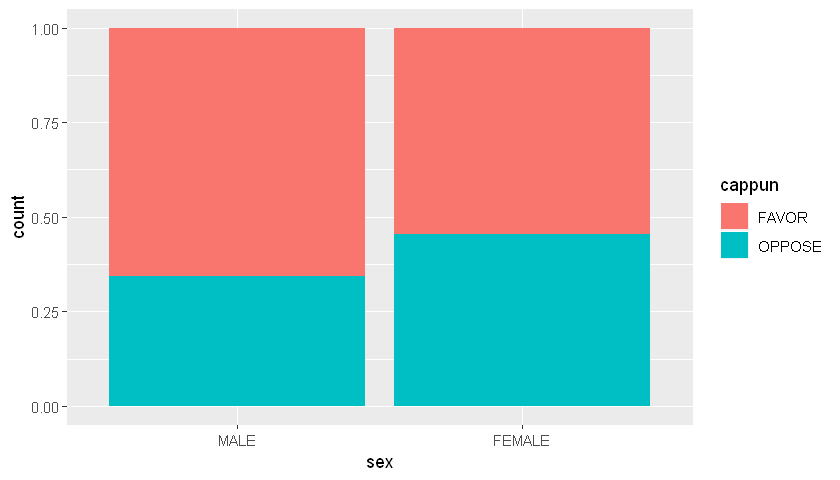

In [1]:
# Setting the size of plots in this notebook
options(repr.plot.width=7, repr.plot.height=4)

# Plot distribution of sex filled by cappun
ggplot(sample, aes(x = sex, fill = cappun)) +
  geom_bar(position = "fill")

In [1]:
# Compute two proportions
p_hats <- sample %>%
  group_by(sex) %>%
      summarize(prop_favor = mean(cappun=="FAVOR")) %>%
          pull()

# See the result
p_hats

[1] 0.6575342 0.5454545

In [1]:
# Compute difference in proportions
d_hat <- diff(p_hats)

# See the result
d_hat

[1] -0.1120797

The difference seems to be remarkable! Now we have to verify if it's simply due to random sampling or not.

In [1]:
# Create null distribution
null <- sample %>%
  specify(cappun ~ sex, success = "FAVOR") %>%
      hypothesize(null = "independence") %>%
          generate(reps = 1000, type = "permute") %>%
              calculate(stat = "diff in props", order = c("FEMALE", "MALE"))

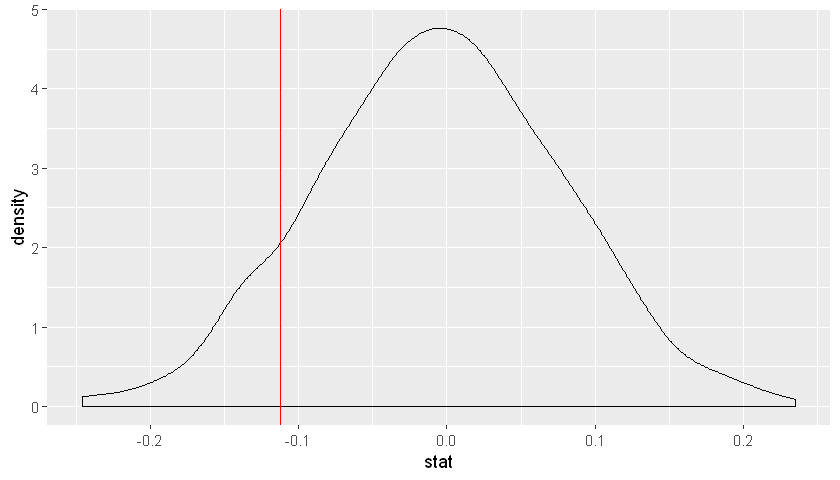

In [1]:
# Visualize null
ggplot(null, aes(x=stat)) +
  geom_density() +
      geom_vline(xintercept = d_hat, color = "red")

In [1]:
# Compute two-tailed p-value
null %>%
  summarize(
    one_tailed_pval = mean(stat <= d_hat),
    two_tailed_pval = 2 * one_tailed_pval) %>%
      pull(two_tailed_pval)

[1] 0.256

The p-value is higher than any acceptable level of significance, so we can conclude that the difference observed is just due to random sampling!